In [1]:
import os, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_path=os.getcwd()+'\\data'
df=pd.read_csv(data_path+'\\kdd99.csv', sep=';')
print(df.shape)

(346016, 46)


In [2]:
print(df.head())

   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_diff_host_rate  \
0               0       0    0  ...                            0   
1               0       0    0  ...                            0   
2               0       0    0  ...                            0   
3               0       0    0  ...                            0   
4               0       0    0  ...                            0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                     0                         0                     0   
1                   

In [3]:
# df['sTos'].value_counts()

In [4]:
# df['dTos'].value_counts()

In [5]:
# df['Proto'].value_counts()

In [6]:
# df['Dir'].value_counts()

In [7]:
# df['Label'].value_counts()

In [8]:
print(df.dtypes)

duration                        int64
protocol_type                  object
service                        object
flag                           object
src_bytes                       int64
dst_bytes                       int64
land                            int64
wrong_fragment                  int64
urgent                          int64
hot                             int64
num_failed_logins               int64
logged_in                       int64
num_compromised                 int64
root_shell                      int64
su_attempted                    int64
num_root                        int64
num_file_creations              int64
num_shells                      int64
num_access_files                int64
num_outbound_cmds               int64
is_host_login                   int64
is_guest_login                  int64
count                           int64
srv_count                       int64
serror_rate                     int64
srv_serror_rate                 int64
rerror_rate 

In [9]:
## DROP COLUMNS NOT NECESSARI
# df.drop('StartTime',axis = 1,inplace= True)
# df.drop('DstAddr',axis = 1,inplace= True)
# df.drop('State',axis = 1,inplace= True)
# df.drop('SrcAddr',axis = 1,inplace= True)
# print(df.dtypes)

print('Data types before transformation')
print(df.dtypes)
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 
,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)
df.drop('service',axis = 1,inplace= True)
df.drop(['target',], axis=1, inplace= True)
df = df.dropna('columns')
df = df[[col for col in df if df[col].nunique() > 1]]
print('Data types after transformation')
print(df.dtypes)

Data types before transformation
duration                        int64
protocol_type                  object
service                        object
flag                           object
src_bytes                       int64
dst_bytes                       int64
land                            int64
wrong_fragment                  int64
urgent                          int64
hot                             int64
num_failed_logins               int64
logged_in                       int64
num_compromised                 int64
root_shell                      int64
su_attempted                    int64
num_root                        int64
num_file_creations              int64
num_shells                      int64
num_access_files                int64
num_outbound_cmds               int64
is_host_login                   int64
is_guest_login                  int64
count                           int64
srv_count                       int64
serror_rate                     int64
srv_serror_rate  

C:\Users\Arnau\AppData\Local\Temp\ipykernel_18080\2010307494.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


Data types after transformation
duration                        int64
protocol_type                   int64
flag                            int64
src_bytes                       int64
dst_bytes                       int64
land                            int64
wrong_fragment                  int64
urgent                          int64
hot                             int64
num_failed_logins               int64
logged_in                       int64
num_compromised                 int64
root_shell                      int64
su_attempted                    int64
num_root                        int64
num_file_creations              int64
num_shells                      int64
num_access_files                int64
is_guest_login                  int64
count                           int64
srv_count                       int64
serror_rate                     int64
srv_serror_rate                 int64
rerror_rate                     int64
srv_rerror_rate                 int64
same_srv_rate     

In [10]:
#print("\n>>> sTos, dTos, Proto, Dir, Label values (only printing Label values) ...")
#df['sTos'].value_counts()
#df['dTos'].value_counts()
#df['Proto'].value_counts()
#df['Dir'].value_counts()
#df['Label'].value_counts()

In [11]:
## DROP COLUMNS WITH NO CHANGING DATA OR NANs
df = df.dropna('columns') ## ports are dropped due to a wrong register
df = df[[col for col in df if df[col].nunique() > 1]]
print(df.dtypes)

duration                        int64
protocol_type                   int64
flag                            int64
src_bytes                       int64
dst_bytes                       int64
land                            int64
wrong_fragment                  int64
urgent                          int64
hot                             int64
num_failed_logins               int64
logged_in                       int64
num_compromised                 int64
root_shell                      int64
su_attempted                    int64
num_root                        int64
num_file_creations              int64
num_shells                      int64
num_access_files                int64
is_guest_login                  int64
count                           int64
srv_count                       int64
serror_rate                     int64
srv_serror_rate                 int64
rerror_rate                     int64
srv_rerror_rate                 int64
same_srv_rate                   int64
diff_srv_rat

C:\Users\Arnau\AppData\Local\Temp\ipykernel_18080\601863964.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') ## ports are dropped due to a wrong register


C:\Users\Arnau\AppData\Local\Temp\ipykernel_18080\904150308.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


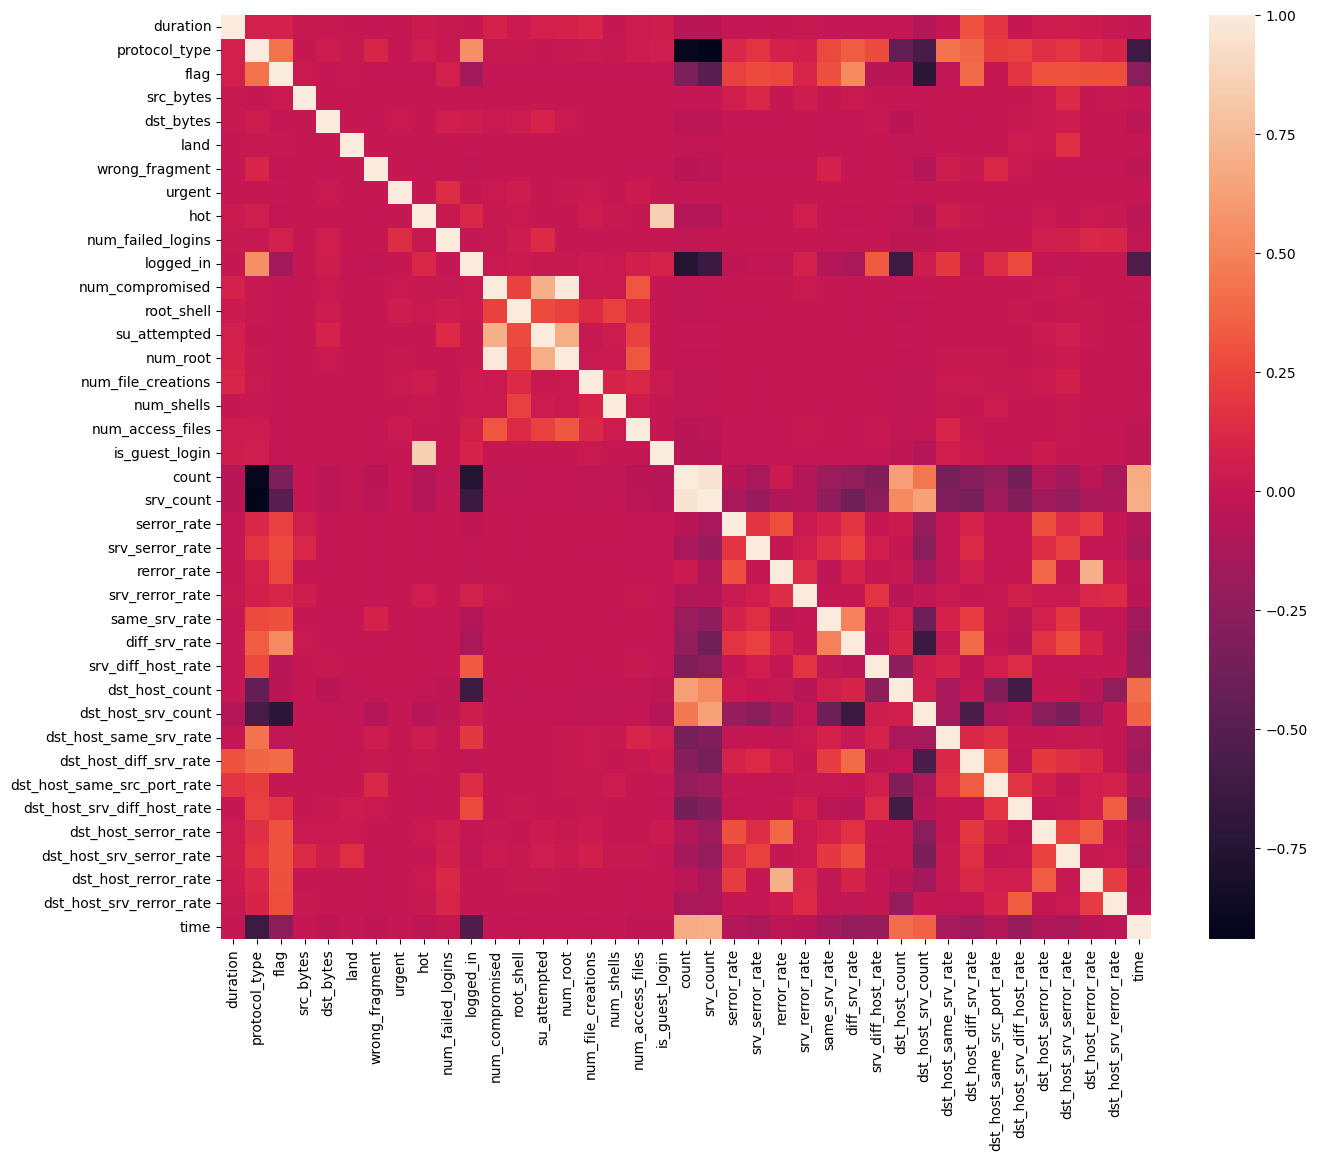

In [12]:
corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()

In [13]:
# cor_thr=0.98
# print('Shape before feature reduction: ', df.shape)
# corr_matrix = df.corr().abs()
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
# to_drop = [column for column in upper.columns if any(upper[column] > cor_thr)]
# print('Features to drop')
# print(to_drop)
# for i in to_drop:
#     df.drop(i,axis = 1,inplace = True)
# print('Shape after feature reduction: ', df.shape)

cor_thr=0.98
print('Shape before feature reduction: ', df.shape)
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > cor_thr)]
print('Features to drop')
print(to_drop)
for i in to_drop:
    df.drop(i,axis = 1,inplace = True)
print('Shape after feature reduction: ', df.shape)

Shape before feature reduction:  (346016, 40)


C:\Users\Arnau\AppData\Local\Temp\ipykernel_18080\3901472919.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


Features to drop
['num_root']
Shape after feature reduction:  (346016, 39)


C:\Users\Arnau\AppData\Local\Temp\ipykernel_18080\3901472919.py:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Target variable and train set
# Y = df[['Label']]
Y = df[['Attack_Type']]
# X = df.drop(['Label',], axis=1)
X = df.drop(['Attack_Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)


(231830, 38) (114186, 38)
(231830, 1) (114186, 1)


In [15]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
# from keras.callbacks import EarlyStopping
# 
# def ann():
#     model = Sequential()
#     model.add(Dense(30,input_dim =32,activation = 'relu',kernel_initializer='random_uniform'))
#     model.add(Dense(5,activation='sigmoid',kernel_initializer='random_uniform'))
#     model.add(Dense(5,activation='softmax'))
#     model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
#     return model
# 
# model_ann = KerasClassifier(build_fn=ann,epochs=50,batch_size=64)
# start_time = time.time()
# callback = EarlyStopping(monitor='loss', patience=5)
# model_ann.fit(X_train, Y_train.values.ravel(), callbacks=[callback])
# time_train_ann = time.time() - start_time

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping

def ann():
    model = Sequential()
    model.add(Dense(30,input_dim =38,activation = 'relu',kernel_initializer='random_uniform'))
    model.add(Dense(5,activation='sigmoid',kernel_initializer='random_uniform'))
    model.add(Dense(5,activation='softmax'))
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    model.summary()
    return model

model_ann = KerasClassifier(build_fn=ann,epochs=50,batch_size=64)
start_time = time.time()

callback = EarlyStopping(monitor='loss', patience=5)
history = model_ann.fit(X_train, Y_train.values.ravel(), callbacks=[callback])

history_dict = history.history
history_dict.keys()



time_train_ann = time.time() - start_time
print('TIME TRAIN: ', time_train_ann)

C:\Users\Arnau\AppData\Local\Temp\ipykernel_18080\1054491751.py:34: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_ann = KerasClassifier(build_fn=ann,epochs=50,batch_size=64)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1170      
                                                                 
 dense_1 (Dense)             (None, 5)                 155       
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
Total params: 1,355
Trainable params: 1,355
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
3623/3623 [==============================] - 3s 708us/step - loss: 0.1835 - accuracy: 0.9526
Epoch 2/50
3623/3623 [==============================] - 3s 705us/step - loss: 0.0497 - accuracy: 0.9843
Epoch 3/50
3623/3623 [==============================] - 2s 680us/step - loss: 0.0335 - accuracy: 0.9891
Epoch 

[0.18346107006072998, 0.04969003051519394, 0.03346305340528488, 0.024317050352692604, 0.01845659874379635, 0.013843662105500698, 0.01118190586566925, 0.00986533984541893, 0.008835889399051666, 0.008037803694605827, 0.007481998298317194, 0.007092416286468506, 0.006656373385339975, 0.0062723178416490555, 0.005893191322684288, 0.00562777416780591, 0.005439150147140026, 0.0051750424318015575, 0.004990867804735899, 0.004766267258673906, 0.00456181401386857, 0.004417570307850838, 0.004244624171406031, 0.0040505267679691315, 0.003940654918551445, 0.0037973346188664436, 0.003680812194943428, 0.0035168512258678675, 0.003455400001257658, 0.003377411514520645, 0.0032897067721933126, 0.0032053173054009676, 0.0032021410297602415, 0.003116495907306671, 0.003048371057957411, 0.0029967506416141987, 0.002922728890553117, 0.0028565942775458097, 0.0028280008118599653, 0.002759782364591956, 0.0026965169236063957, 0.0026953828055411577, 0.002655640710145235, 0.0025986889377236366, 0.0026179191190749407, 0.

C:\Users\Arnau\AppData\Local\Temp\ipykernel_18080\3689560644.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(0, 50), loss, 'bo', label='Training loss', color='red')
C:\Users\Arnau\AppData\Local\Temp\ipykernel_18080\3689560644.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(0, 50), accuracy, 'bo', label='Training acc', color='red')


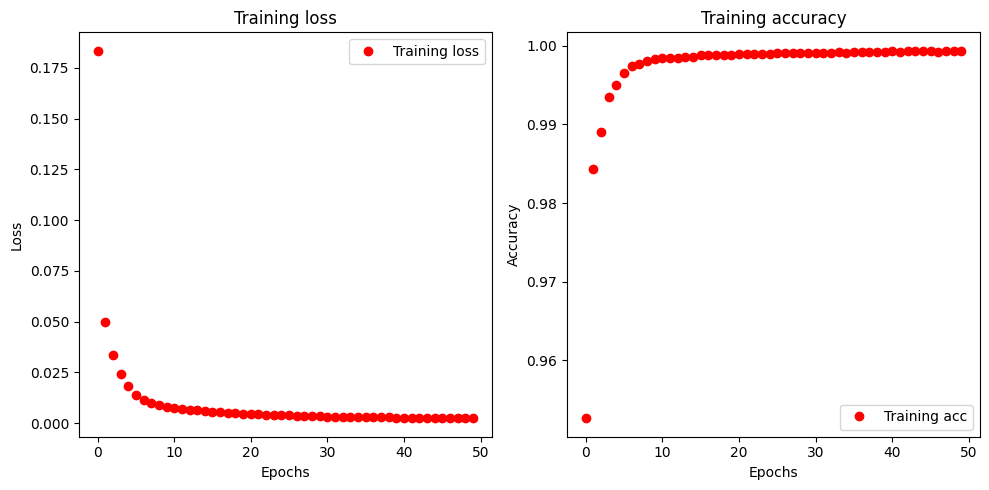

In [16]:
loss = history.history['loss']
accuracy = history.history['accuracy']

print(loss)
print(accuracy)
    
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(1, 2, 1)
plt.plot(range(0, 50), loss, 'bo', label='Training loss', color='red')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(0, 50), accuracy, 'bo', label='Training acc', color='red')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

ANN evaluation
3569/3569 [==============================] - 2s 458us/step
Overall accuracy training:  0.9994176767458914
Overall accuracy test:  0.9990016289212338
Training time (seconds per sample):  0.0005476778320656733
Evaluation time (seconds per sample):  2.1568650835748628e-05


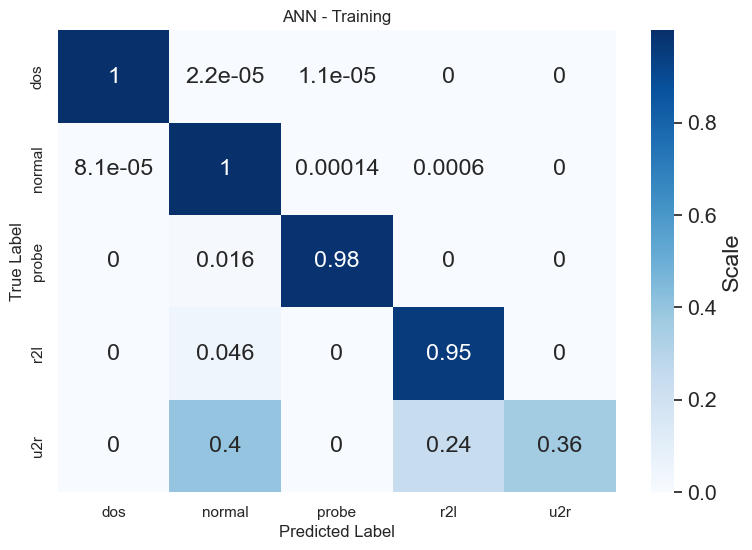

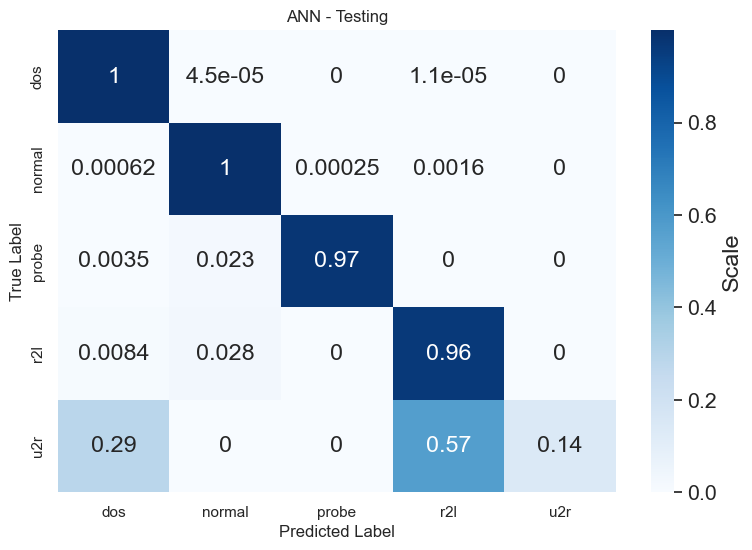

In [17]:
from sklearn.metrics import accuracy_score
def plot_confusion_matrix(Y_real, Y_pred, title=None):
    labels=np.unique(Y_real)
    nc=len(labels)
    data=np.zeros((nc,nc))
    pairs=zip(Y_real,Y_pred)
    pairs=list(pairs)
    for p in pairs: data[np.where(labels==p[0]),np.where(labels==p[1])]+=1
    row_total=np.sum(data,axis=1)
    data=data/row_total.reshape((nc,1))
    sns.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
    plt.title('Confusion Matrix') if title is None else plt.title(title)
    sns.set(font_scale=1.4)
    ax = sns.heatmap(data, annot=True, cmap='Blues', cbar_kws={'label': 'Scale'})
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set(ylabel='True Label', xlabel='Predicted Label')
    plt.show()
    
  
print('ANN evaluation')
start_time = time.time()
Y_train_pred=model_ann.predict(X_train)
Y_test_pred=model_ann.predict(X_test)
time_eval_ann=time.time()-start_time

print('Overall accuracy training: ', accuracy_score(Y_train,Y_train_pred))
print('Overall accuracy test: ', accuracy_score(Y_test,Y_test_pred))

print('Training time (seconds per sample): ', time_train_ann/float(Y_train.shape[0]))
print('Evaluation time (seconds per sample): ', 
time_eval_ann/(float(Y_train.shape[0])+float(Y_test.shape[0])))

plot_confusion_matrix(Y_train.values.ravel(),Y_train_pred, title='ANN - Training')
plot_confusion_matrix(Y_test.values.ravel(),Y_test_pred, title='ANN - Testing')
    
